In [159]:
from IPython.display import HTML, display

# Project: Compute statistics from deck of cards
<br>
<font color='maroon'>
by- Shruti Tiwari </font>
<br>
<br>

<font color = 'blue'>First, create a histogram depicting the relative frequencies of the card values for a single draw. Report the mean, median, and standard deviation of the value distribution.</font>

Distribution of card values:
<br>The histogram of values of single draw:
<br>

<table><tr><td><img  src='single_draw.png'></td></tr></table>

<br>
The histogram of the single draw is negatively skewed with the mode at 10, median at 7, mean at 6.54 and standard deviation of 3.15. The reason for skewness in the distribution is that even if each card in the deck has even probability there are four cards(10, J, Q, k) with the score 10. Therefore the probability of next card to have score 10 is 4/13 while the probability of score from 1 to 9 is 1/13. Now, this skewness would not have risen if the score of the cards were evenly distributed such as Jack = 11, Queen = 12 and King = 13. In that case, each score will have a probability of 1/13.

<font color = 'blue'>Take a look at the distribution of the three-card sums from the samples that you obtained, either from Generate Data, or from your own collection. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.</font>

I generated data for the sum of three card draws 30 times using my own code. For this sample, the median is 21, mean is 20.73 and std is 4.32. The minimum value is 10 and the maximum value is 30. Though the minimum combination of three draws from the deck can be three aces summing up to 3 and the maximum value is 30. There is 25% probability that the sum for future draws will be below 17.5 and 75% probability that the sum will be below 23.

<font color = 'blue'>Create a histogram of the sampled three-card sums. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?</font>

The histogram is almost a normal distribution with a little negative skewness. This skewness is a result of a weighted probability of a card to have a score 10. The mode of the distribution is 23.
<table><tr><td><img  src='3_draw.png'></td></tr></table>

<font color = 'blue'>Make some estimates about values you would get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.</font>

We know since we have 4 set of cards with the ranks 1 to 10 the sum of three draws lie in the range 3 to 30 with 100% probability. But in this sample minimum value is 10 and the maximum value is 30 hence the probability of future draws based on this sample will be different. For these calculations, we will presume the sample distribution is a perfect normal distribution i.e. dispersion on both sides of the mean is symmetric.

In order to get the range of value which falls in 90% probability range, we find the z score of 5% probability and 95% probability i.e. p = 0.05 and p = 0.95 and takes the difference.

z-score for p = 0.05 is -1.65
z score for p = 0.95 is  1.65

The range of value to lie in 90 % probability range is

20.73-1.65*4.32 to 20.73 + 1.65*4.32

13.60 to 27.86

To calculate the probability of value 20 we locate it on the standardized normal distribution.
In other words, we calculate it's z-score.
<br>
z-score = (value - mean)/std = -0.169
<br> from the z-table p corresponding z = -0.17 is 0.0475
<br> Here, I would like to emphasize that if it were actually a perfectly normal distribution, mean and median would have been equal to 20 and the distribution would be symmetric to both sides of mean. In that ideal condition, the probability of next value to be 20 would be 0.05. 

The code starts here ...

In [160]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [161]:
from enum import Enum

# Source: https://docs.python.org/3.4/library/enum.html#orderedenum
#
class OrderedEnum(Enum):
    def __ge__(self, other):
        if self.__class__ is other.__class__:
            return self.value >= other.value
        return NotImplemented
    def __gt__(self, other):
        if self.__class__ is other.__class__:
            return self.value > other.value
        return NotImplemented
    def __le__(self, other):
        if self.__class__ is other.__class__:
            return self.value <= other.value
        return NotImplemented
    def __lt__(self, other):
        if self.__class__ is other.__class__:
            return self.value < other.value
        return NotImplemented

In [162]:
class Rank(OrderedEnum):
    ace = 1
    two = 2
    three = 3
    four = 4
    five = 5
    six = 6
    seven = 7
    eight = 8
    nine = 9
    ten = 10
    jack = 11
    queen = 12
    king = 13
    
    @property
    def score(self):
        if (self.value <= 10):
            return self.value
        else:
            return 10

In [163]:

Suit  =  OrderedEnum ("Suit", "heart diamond club spade")

In [164]:
class Card(object):
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
        
    def __str__(self):
        return "{} of {}s".format(self.rank.name.capitalize(), self.suit.name.capitalize())
    
    def __repr__(self):
        return "{} of {}s".format(self.rank.name.capitalize(), self.suit.name.capitalize())
    
    def __value__(self):
        return self.rank.score()


In [165]:
class Deck(object):
    def __init__(self):
        self.cards = []
        for suit in Suit:
            for rank in Rank:
                card = Card(rank, suit)
                self.cards.append(card)

In [166]:
import pandas as pd
df = pd.DataFrame({'card': Deck().cards})
df['suit'] = df.card.map(lambda c: c.suit)
df['rank'] = df.card.map(lambda c: c.rank)
df['score'] = df.card.map(lambda c: c.rank.score)
df.head()

,card,suit,rank,score
0,Ace of Hearts,Suit.heart,Rank.ace,1
1,Two of Hearts,Suit.heart,Rank.two,2
2,Three of Hearts,Suit.heart,Rank.three,3
3,Four of Hearts,Suit.heart,Rank.four,4
4,Five of Hearts,Suit.heart,Rank.five,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1209b9b38>]], dtype=object)

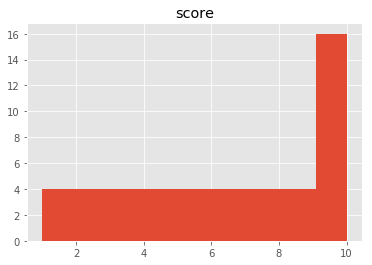

In [167]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df.hist()

In [168]:
df.median()
df.describe()


,score
count,52.000000
mean,6.538462
std,3.183669
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,10.000000


In [169]:
import numpy as np

def take_sample(n=3):
    return df.reindex(np.random.permutation(df.index)).head(n)

samples = []
for _ in range(30):
    samples.append(take_sample()['score'].sum())

samples = pd.Series(samples)
print("median = ", samples.median())
samples.describe()

median =  20.0


count    30.000000
mean     20.433333
std       5.177427
min      11.000000
25%      16.000000
50%      20.000000
75%      25.000000
max      28.000000
dtype: float64

In [170]:

writer = pd.ExcelWriter('output.xlsx')
samples.to_excel(writer,'Sheet1')
writer.save()

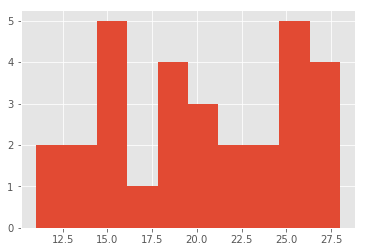

In [171]:
samples.hist(bins =10)
plt.savefig("3_draw.png")

In [172]:
samples.median()
samples.describe()


count    30.000000
mean     20.433333
std       5.177427
min      11.000000
25%      16.000000
50%      20.000000
75%      25.000000
max      28.000000
dtype: float64